In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 20s 338us/step - loss: 0.2541 - acc: 0.9221 - val_loss: 0.0559 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.0840 - acc: 0.9747 - val_loss: 0.0389 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0637 - acc: 0.9812 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0518 - acc: 0.9847 - val_loss: 0.0321 - val_acc: 0.9879
Epoch 5/12
60000/60000 [===========

# ================ Assignment =================================

In [0]:
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<h1> Model 1: 7 conv layers + filter size = 3x3 + relu activation + dropout + maxpool</h1>


In [3]:
model = Sequential()

model.add(Conv2D(20, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(25, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(35, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(45, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(55, (3, 3), activation='relu',padding='same'))


model.add(Conv2D(65, (3, 3), activation='relu',padding='same'))


model.add(Conv2D(75, (3, 3), activation='relu',padding='same'))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 92us/step - loss: 1.9629 - acc: 0.2586 - val_loss: 1.0974 - val_acc: 0.5476
Epoch 2/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.8247 - acc: 0.7071 - val_loss: 0.3049 - val_acc: 0.9334
Epoch 3/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.4365 - acc: 0.8773 - val_loss: 0.1613 - val_acc: 0.9644
Epoch 4/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.3244 - acc: 0.9146 - val_loss: 0.1257 - val_acc: 0.9698
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.2699 - acc: 0.9323 - val_loss: 0.1060 - val_acc: 0.9759
Epoch 6/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.2348 - acc: 0.9408 - val_loss: 0.1107 - val_acc: 0.9726
Epoch 7/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.2188 - acc: 0.9465 - val_loss: 0.0783 - val_acc

Test score: 0.07009304843556602
Test accuracy: 0.986


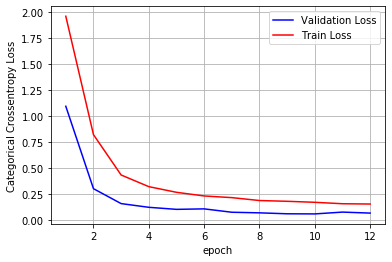

In [8]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

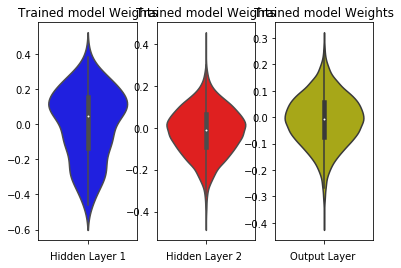

In [11]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> Model 2: 5 conv layers + filter size = 3x3 + relu activation + dropout + maxpool</h1>



In [17]:
model = Sequential()

model.add(Conv2D(40, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(40, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(50, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(55, (3, 3), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(55, (3, 3), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 40)        400       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 40)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 40)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 40)        14440     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 40)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 6, 6, 40)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 6, 6, 50)         

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.4544 - acc: 0.8515 - val_loss: 0.0679 - val_acc: 0.9779
Epoch 2/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.1046 - acc: 0.9702 - val_loss: 0.0475 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0747 - acc: 0.9786 - val_loss: 0.0424 - val_acc: 0.9861
Epoch 4/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0580 - acc: 0.9834 - val_loss: 0.0546 - val_acc: 0.9837
Epoch 5/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0510 - acc: 0.9854 - val_loss: 0.0302 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0437 - acc: 0.9872 - val_loss: 0.0314 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0374 - acc: 0.9893 - val_loss: 0.0273 - val_ac

Test score: 0.024910171242001615
Test accuracy: 0.9927


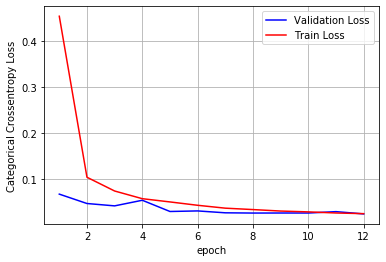

In [19]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

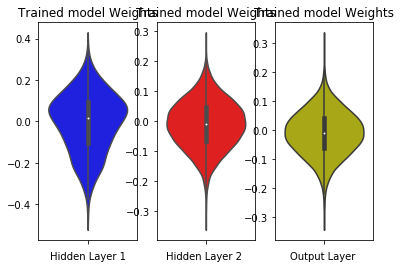

In [20]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1>Model 3: 3 Convolution Layers + filter size = 5x5 + dropout + maxpool</h1>


In [21]:
model = Sequential()

model.add(Conv2D(40, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(50, (5, 5), activation='relu',padding='same'))


model.add(Conv2D(55, (5, 5), activation='relu',padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 24, 24, 40)        1040      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 40)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 12, 12, 40)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 50)        50050     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 12, 12, 55)        68805     
_________________________________________________________________
flatten_7 (Flatten)          (None, 7920)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.2478 - acc: 0.9226 - val_loss: 0.0481 - val_acc: 0.9846
Epoch 2/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.0675 - acc: 0.9807 - val_loss: 0.0274 - val_acc: 0.9907
Epoch 3/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0445 - acc: 0.9870 - val_loss: 0.0267 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.0356 - acc: 0.9894 - val_loss: 0.0222 - val_acc: 0.9928
Epoch 5/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.0286 - acc: 0.9914 - val_loss: 0.0230 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0228 - acc: 0.9932 - val_loss: 0.0219 - val_acc: 0.9936
Epoch 7/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.0205 - acc: 0.9939 - val_loss: 0.0286 - val

Test score: 0.022570345474630403
Test accuracy: 0.9934


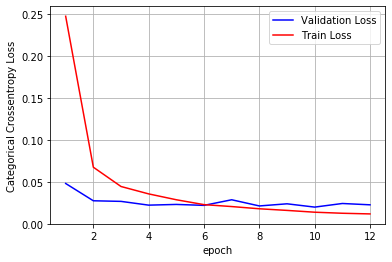

In [23]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

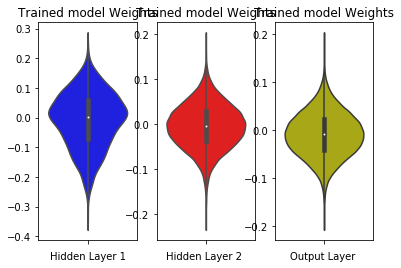

In [24]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusion

In [26]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Conv Layers","Filter Size", "Max Pool", "Test Accuracy"]
x.add_row(["1","7", "(3X3)" ,"(2x2)", "98.60"])
x.add_row(["2","5", "(3x3)" ,"(2x2)", "99.27"])
x.add_row(["3","3", "(5x5)" ,"(2x2)", "99.34"])
print(x)

+-------+-------------+-------------+----------+---------------+
| Model | Conv Layers | Filter Size | Max Pool | Test Accuracy |
+-------+-------------+-------------+----------+---------------+
|   1   |      7      |    (3X3)    |  (2x2)   |     98.60     |
|   2   |      5      |    (3x3)    |  (2x2)   |     99.27     |
|   3   |      3      |    (5x5)    |  (2x2)   |     99.34     |
+-------+-------------+-------------+----------+---------------+
